<a href="https://colab.research.google.com/github/CaptainMarlow/IAD_labs/blob/main/IAD_Lab1_Sliepyi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота №1 Виконана студентом групи ФБ-52мп Слєпим Романом.

In [135]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay
)

Спершу завантажую усі необхідні для виконання роботи бібліотеки.

In [136]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nba_logreg.csv')

In [137]:
df.head()

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Як бачимо, маємо датасет, де нашою цільовою ознакою класифікації є виявлення того чи буде баскетболіст грати у лізі понад 5 років.

In [138]:
df = df.drop('name', axis=1)

In [139]:
df.head()

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Було прибрано колонку імені - "name", оскільки вона не несе потреби ні для класифікації, ні для візуалізації даних.

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gp           1340 non-null   int64  
 1   min          1340 non-null   float64
 2   pts          1340 non-null   float64
 3   fgm          1340 non-null   float64
 4   fga          1340 non-null   float64
 5   fg           1340 non-null   float64
 6   3p_made      1340 non-null   float64
 7   3pa          1340 non-null   float64
 8   3p           1329 non-null   float64
 9   ftm          1340 non-null   float64
 10  fta          1340 non-null   float64
 11  ft           1340 non-null   float64
 12  oreb         1340 non-null   float64
 13  dreb         1340 non-null   float64
 14  reb          1340 non-null   float64
 15  ast          1340 non-null   float64
 16  stl          1340 non-null   float64
 17  blk          1340 non-null   float64
 18  tov          1340 non-null   float64
 19  target

In [141]:
df.isnull().sum()

,0
gp,0
min,0
pts,0
fgm,0
fga,0
fg,0
3p_made,0
3pa,0
3p,11
ftm,0


In [142]:
df.dropna(inplace=True)

In [143]:
df.isnull().sum()

,0
gp,0
min,0
pts,0
fgm,0
fga,0
fg,0
3p_made,0
3pa,0
3p,0
ftm,0


Як бачимо в датасеті відсутні рядки з пустими значеннями.

In [144]:
df.describe()

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,60.402558,17.647931,6.820166,2.634763,5.902483,44.117532,0.249661,0.785628,19.308126,1.302784,1.827314,70.407148,1.007600,2.021445,3.028442,1.558992,0.620391,0.366140,1.196012,0.621520
std,17.481092,8.327441,4.365671,1.686850,3.598820,6.119492,0.384608,1.063856,16.022916,0.989341,1.326655,10.489838,0.779178,1.362464,2.062357,1.474159,0.410533,0.428534,0.724470,0.485191
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.800000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.800000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.600000,2.100000,4.800000,43.900000,0.100000,0.300000,22.400000,1.000000,1.500000,71.300000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.800000,0.400000,1.200000,32.500000,1.700000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [145]:
df.shape

(1329, 20)

Отже загальна розмірність датасету 1329 x 20.

In [146]:
results={}

Створюю словник results з метою зберігання результатів різних методів класифікації відповідно до принципу "назва":"точність".


3.1 Побудова heatmap кореляцій.


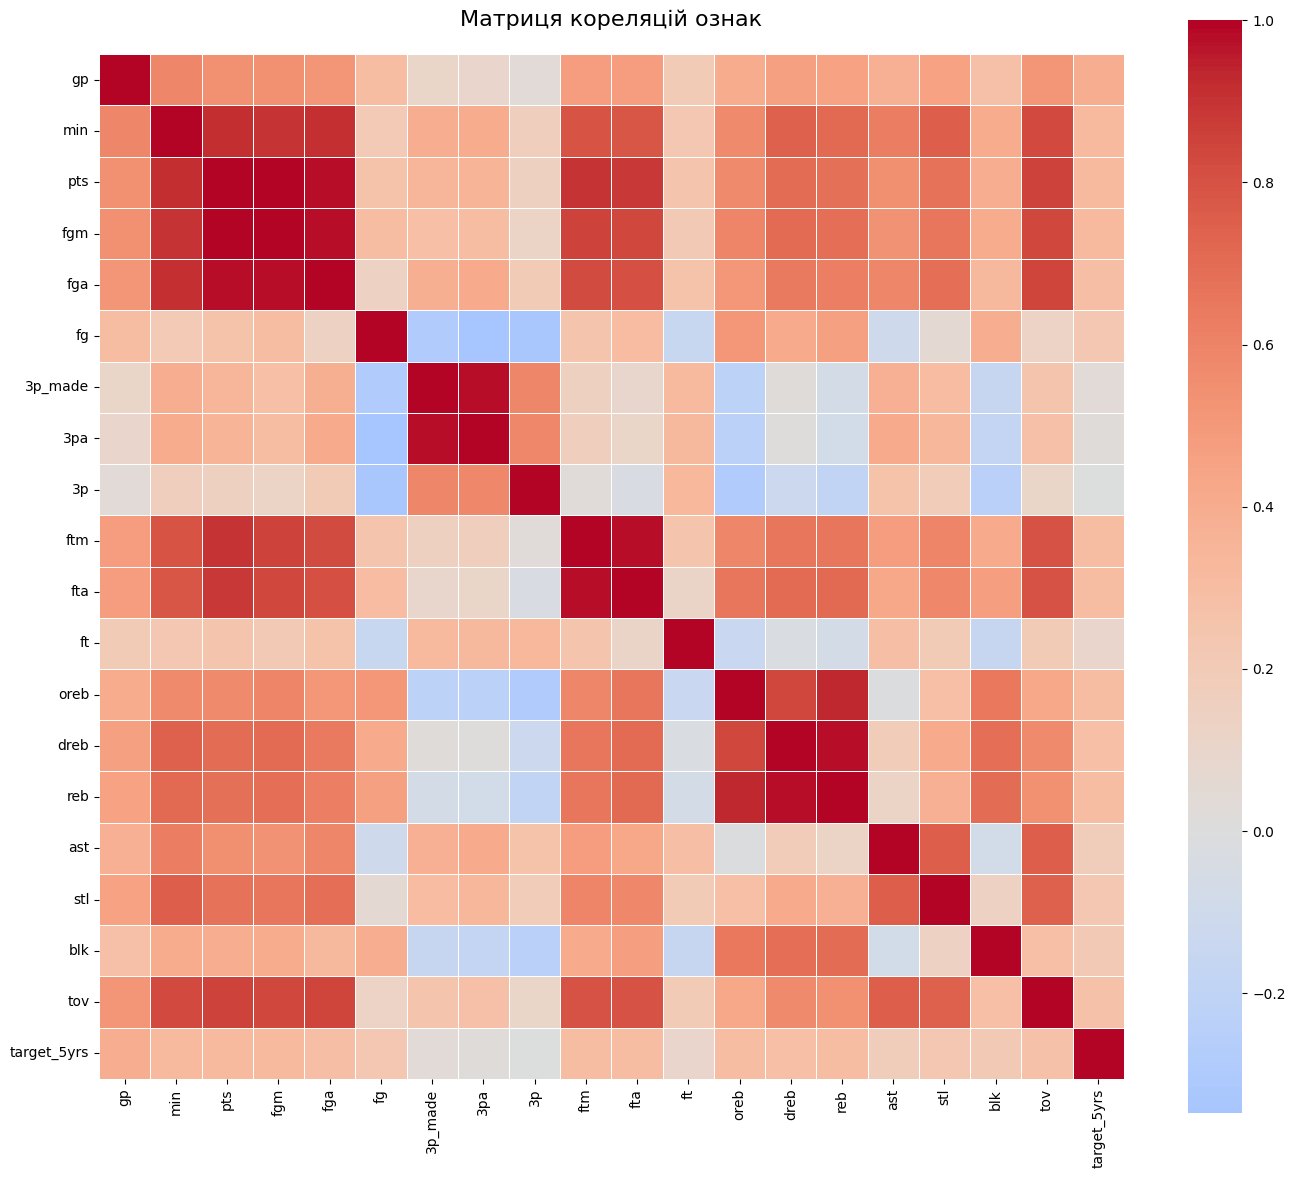


Топ 10 ознак з найсильнішою кореляцією з цільовою змінною:
gp      0.397783
fgm     0.316393
min     0.316031
pts     0.314632
reb     0.300491
fta     0.296018
ftm     0.295546
oreb    0.294637
fga     0.290684
dreb    0.285673
Name: target_5yrs, dtype: float64

3.2 Побудова гістограм розподілу.


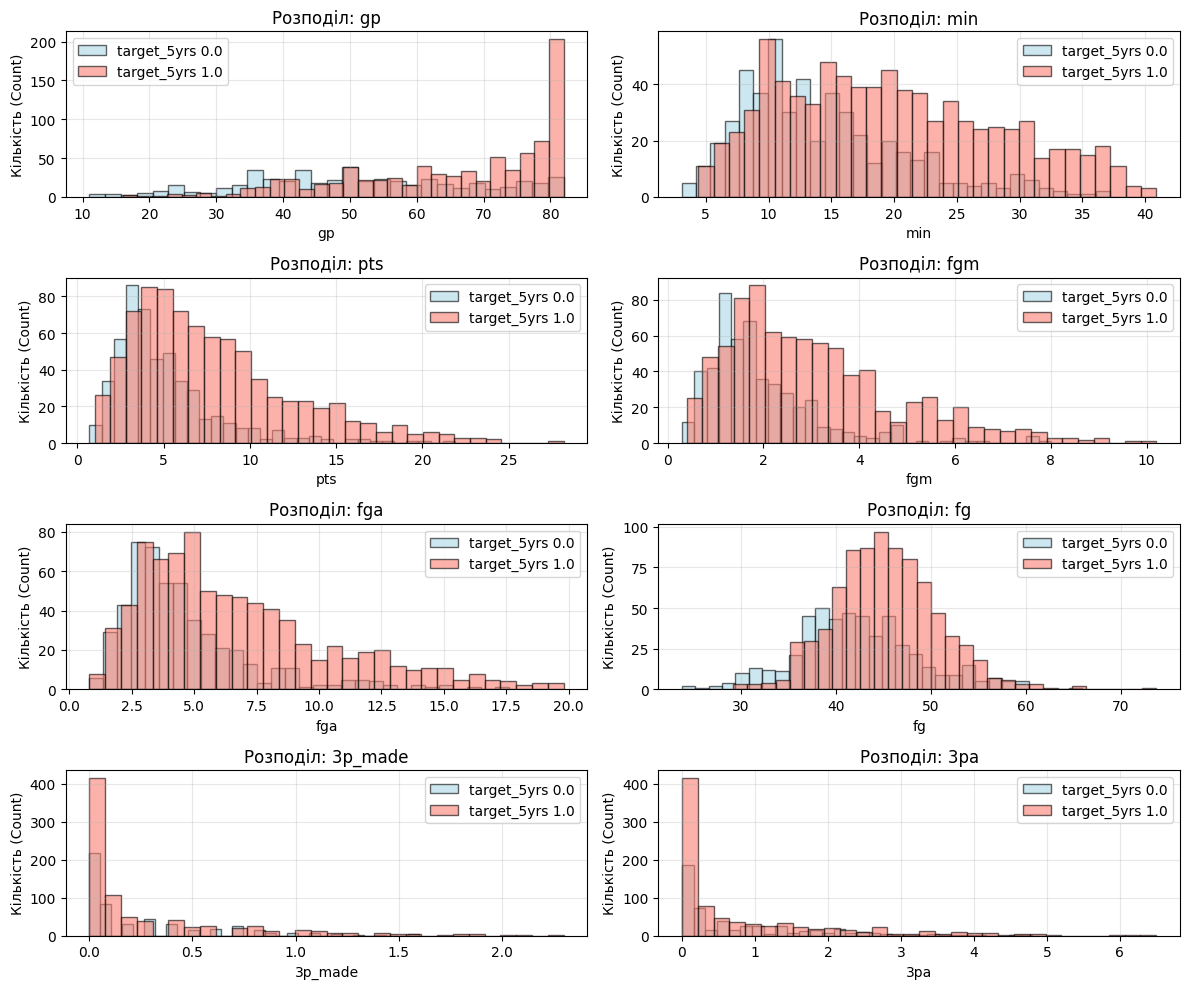


3.3 Побудова boxplot-ів


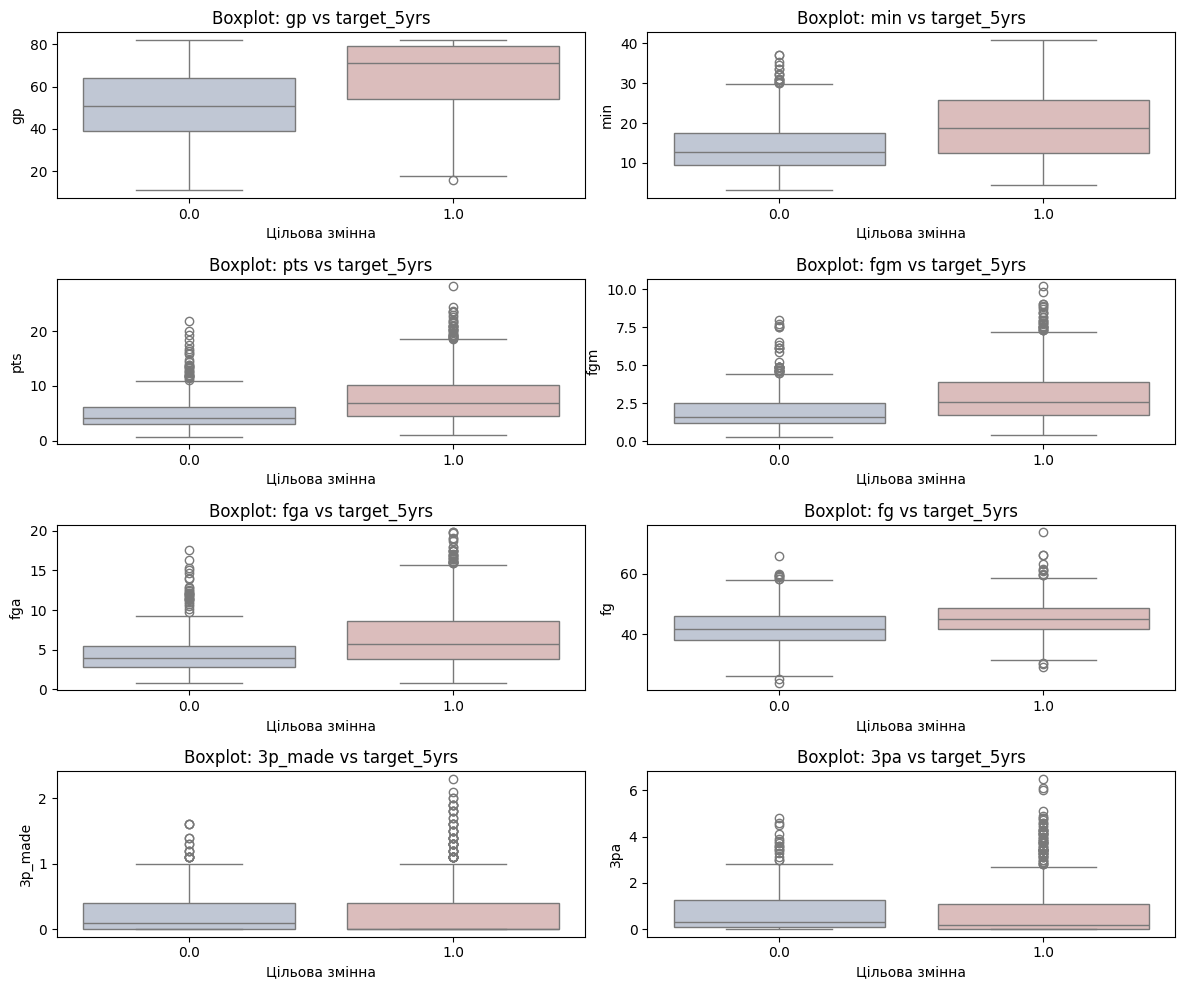

In [147]:
#Розділення даних на ознаки (X) та цільову змінну (y)
y = df['target_5yrs']
X = df.drop('target_5yrs', axis=1)

# Визначення констант для візуалізацій
N_COLS_TO_PLOT = 8
N_ROWS = 4
N_COLS = 2
PLOT_SIZE = (12, 10)
TARGET_COLUMN = 'target_5yrs'


# --- 3. Візуалізація та аналіз ---
# 3.1 Heatmap кореляцій
print("\n3.1 Побудова heatmap кореляцій.")
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5
)
plt.title('Матриця кореляцій ознак', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Топ кореляцій з цільовою змінною
print("\nТоп 10 ознак з найсильнішою кореляцією з цільовою змінною:")
target_corr = (
    correlation_matrix[TARGET_COLUMN]
    .drop(TARGET_COLUMN)
    .abs()
    .sort_values(ascending=False)
)
print(target_corr.head(10))


# 3.2 Гістограми розподілу ознак з розподілом по класах
print("\n3.2 Побудова гістограм розподілу.")
features_to_plot = X.columns[:N_COLS_TO_PLOT]

# Створення фігури та осей заздалегідь
fig, axes = plt.subplots(N_ROWS, N_COLS, figsize=PLOT_SIZE)
axes = axes.ravel()

# Визначення кольорів та класів для спрощення
unique_classes = sorted(y.unique())
colors = {0: 'lightblue', 1: 'salmon'}  # Використання словника
bins = 30
alpha = 0.6
edgecolor = 'black'

for idx, col in enumerate(features_to_plot):
    ax = axes[idx]  # Збереження поточної осі

    # Побудова гістограм для кожного класу
    for class_label in unique_classes:
        class_data = X.loc[y == class_label, col]
        ax.hist(
            class_data,
            bins=bins,
            edgecolor=edgecolor,
            alpha=alpha,
            label=f'{TARGET_COLUMN} {class_label}',
            color=colors.get(class_label, 'gray')
        )

    ax.set_title(f'Розподіл: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Кількість (Count)')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# 3.3 Boxplot-и ознак відносно цільової змінної
print("\n3.3 Побудова boxplot-ів")
fig, axes = plt.subplots(N_ROWS, N_COLS, figsize=PLOT_SIZE)
axes = axes.ravel()

for idx, col in enumerate(features_to_plot):
    sns.boxplot(
        x=y,
        y=X[col],
        ax=axes[idx],
        palette="vlag"
    )
    axes[idx].set_title(f'Boxplot: {col} vs {TARGET_COLUMN}')
    axes[idx].set_xlabel('Цільова змінна')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

Розбиваємо дані на тестову та тренувальну вибірку.

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Розмір навчальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")

Розмір навчальної вибірки: (1063, 19)
Розмір тестової вибірки: (266, 19)


Проводимо нормалізацію даних

In [149]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Приклад нормалізації (перша ознака):")
print(f"До нормалізації - середнє: {X_train.iloc[:, 0].mean():.2f}, std: {X_train.iloc[:, 0].std():.2f}")
print(f"Після нормалізації - середнє: {X_train_scaled[:, 0].mean():.2f}, std: {X_train_scaled[:, 0].std():.2f}")


Приклад нормалізації (перша ознака):
До нормалізації - середнє: 60.43, std: 17.42
Після нормалізації - середнє: 0.00, std: 1.00


Проводжу навчання моделей відповідно до вимог 5.1-5.5 (kNN(k-nearest neighbours), дерево ухвалення рішень, SVM(support vector machine), Random Forest i AdaBoost)

Навчаю модель kNN

5.1 Навчання kNN.
Оптимальне значення k: 7
Точність kNN: 0.7406


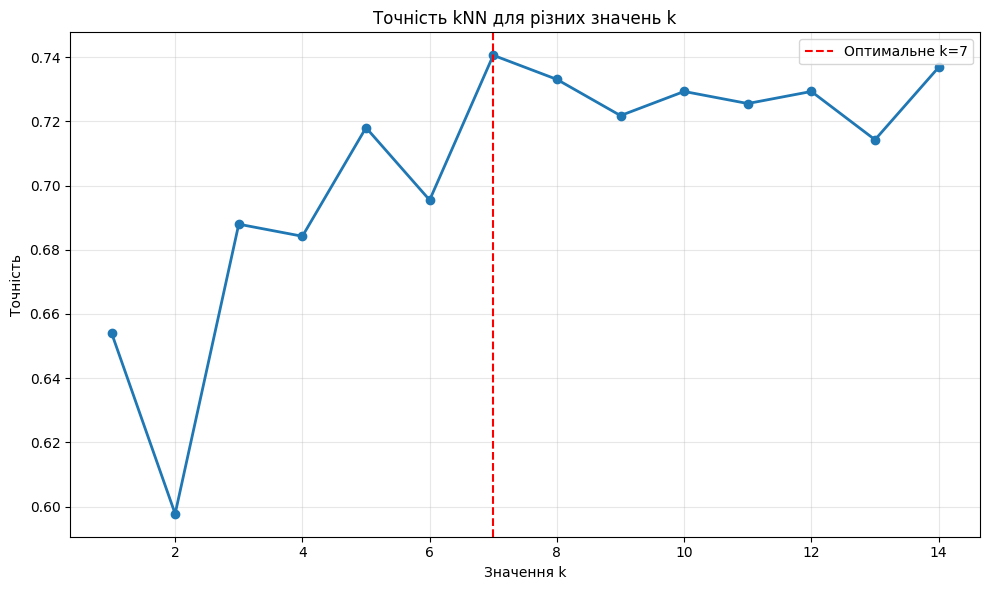

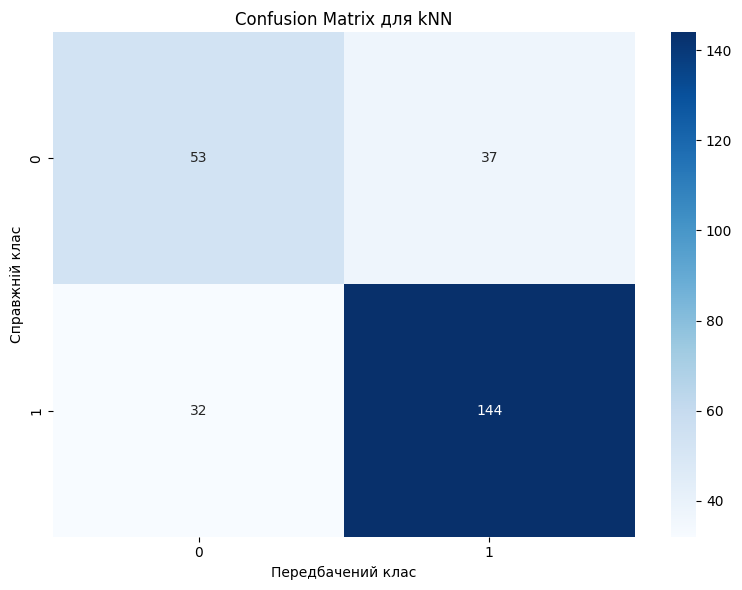


Classification Report для kNN:
              precision    recall  f1-score   support

         0.0       0.62      0.59      0.61        90
         1.0       0.80      0.82      0.81       176

    accuracy                           0.74       266
   macro avg       0.71      0.70      0.71       266
weighted avg       0.74      0.74      0.74       266



In [150]:
# 5.1 kNN з підбором параметрів
print("5.1 Навчання kNN.")
k_range = range(1, 15)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    k_scores.append(knn.score(X_test_scaled, y_test))

best_k = k_range[np.argmax(k_scores)]
print(f"Оптимальне значення k: {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_knn = knn_best.predict(X_test_scaled)
results['kNN'] = accuracy_score(y_test, y_pred_knn)
print(f"Точність kNN: {results['kNN']:.4f}")

# Графік залежності точності від k
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Значення k')
plt.ylabel('Точність')
plt.title('Точність kNN для різних значень k')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Оптимальне k={best_k}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("\n")

# Confusion Matrix і Classification Report для kNN
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix для kNN')
plt.ylabel('Справжній клас')
plt.xlabel('Передбачений клас')
plt.tight_layout()
plt.show()
print("\nClassification Report для kNN:")
print(classification_report(y_test, y_pred_knn))

Навчаю модель дерева рішень

5.2 Навчання дерева ухвалення рішень.
Оптимальна глибина дерева: 3


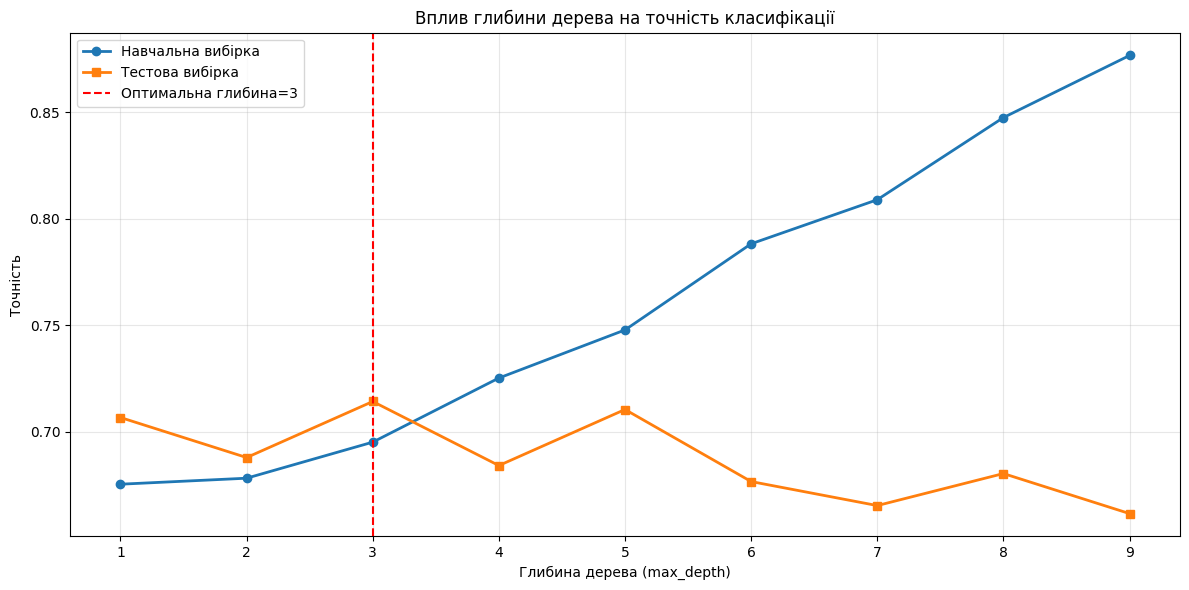

Точність дерева рішень: 0.7143


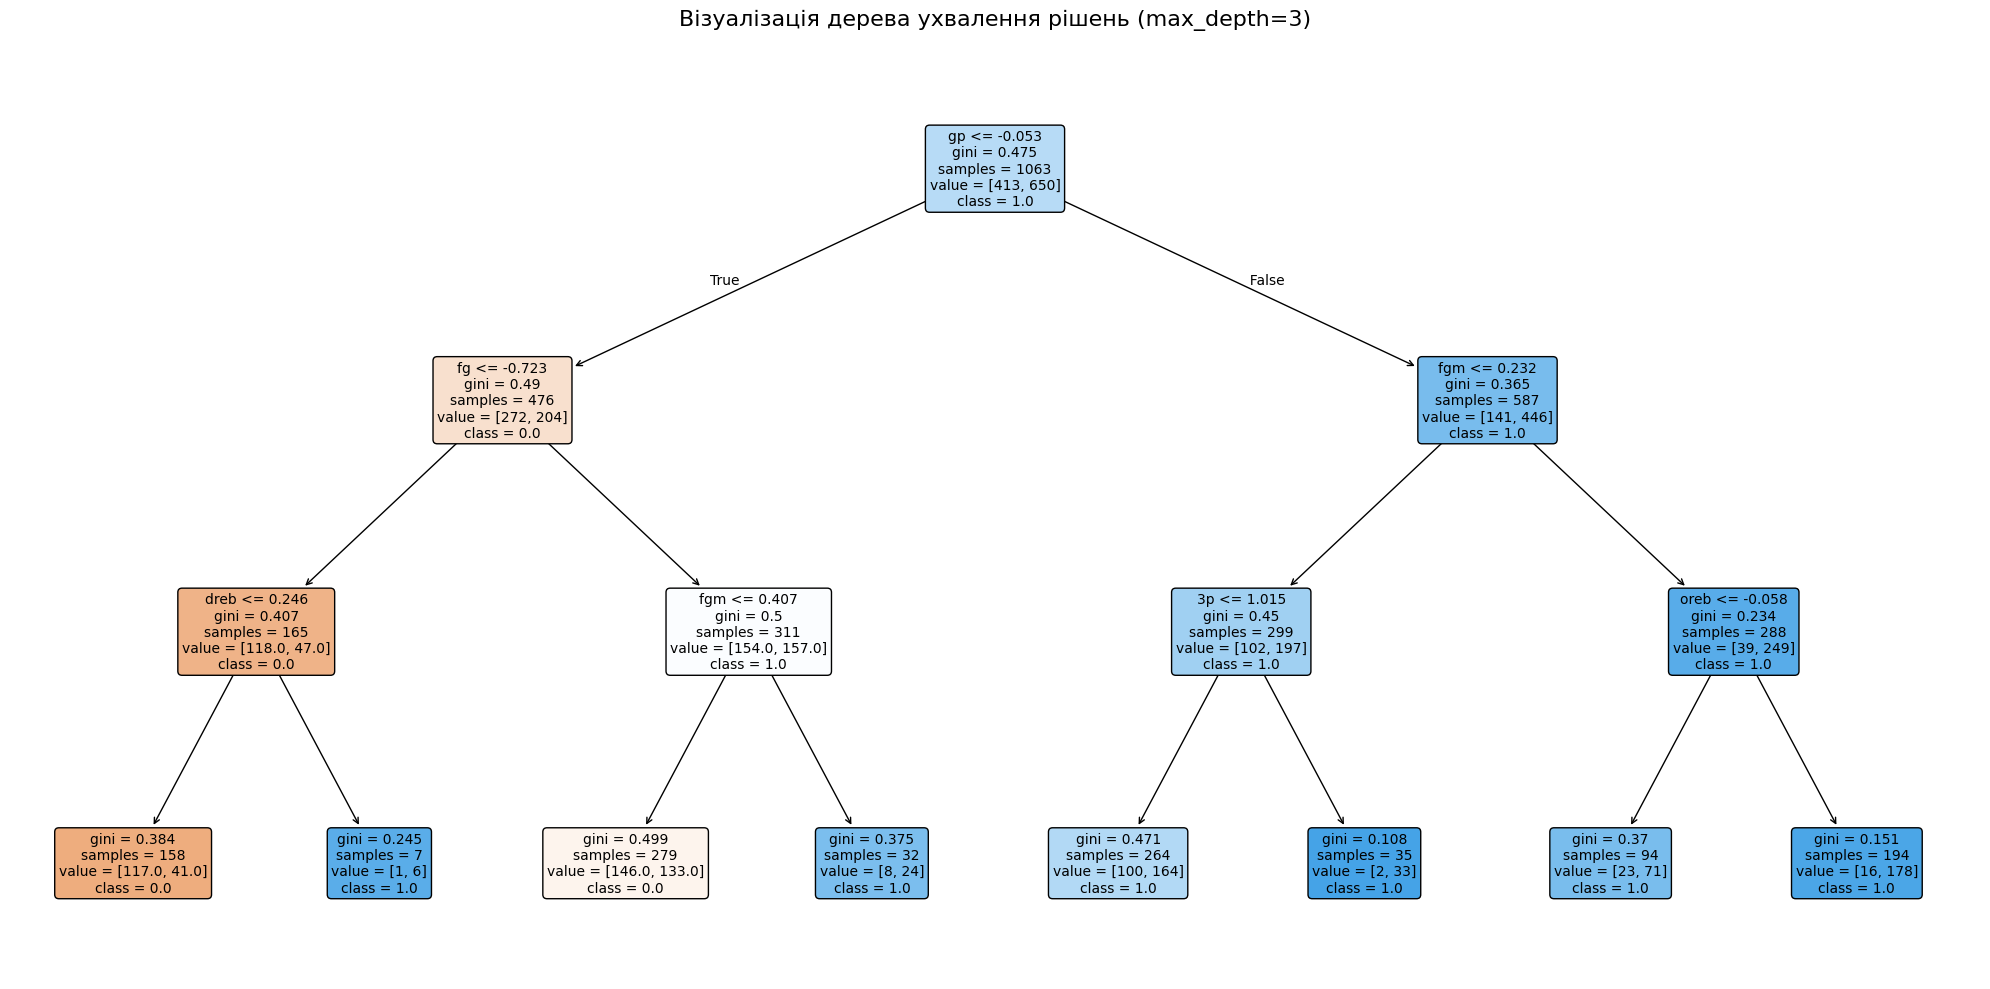


Топ 10 найважливіших ознак:
feature  importance
     gp    0.580651
    fgm    0.168183
     fg    0.105037
     3p    0.064375
   dreb    0.048208
   oreb    0.033545
    min    0.000000
    pts    0.000000
    3pa    0.000000
3p_made    0.000000

Confusion Matrix для Decision Tree:


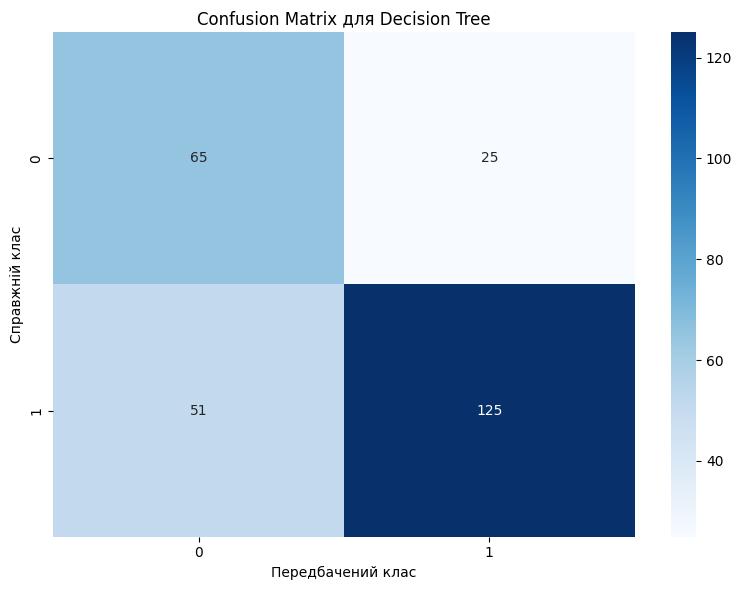


Classification Report для Decision Tree:
              precision    recall  f1-score   support

         0.0       0.56      0.72      0.63        90
         1.0       0.83      0.71      0.77       176

    accuracy                           0.71       266
   macro avg       0.70      0.72      0.70       266
weighted avg       0.74      0.71      0.72       266



In [151]:
# 5.2 Дерево рішень
print("5.2 Навчання дерева ухвалення рішень.")

# Підбір оптимальної глибини
depth_range = range(1, 10)
train_scores = []
test_scores = []

for depth in depth_range:
    dt_temp = DecisionTreeClassifier(random_state=42, max_depth=depth)
    dt_temp.fit(X_train_scaled, y_train)
    train_scores.append(dt_temp.score(X_train_scaled, y_train))
    test_scores.append(dt_temp.score(X_test_scaled, y_test))
best_depth = depth_range[np.argmax(test_scores)]
print(f"Оптимальна глибина дерева: {best_depth}")

# Візуалізація впливу глибини на точність
plt.figure(figsize=(12, 6))
plt.plot(depth_range, train_scores, marker='o', label='Навчальна вибірка', linewidth=2)
plt.plot(depth_range, test_scores, marker='s', label='Тестова вибірка', linewidth=2)
plt.axvline(x=best_depth, color='r', linestyle='--', label=f'Оптимальна глибина={best_depth}')
plt.xlabel('Глибина дерева (max_depth)')
plt.ylabel('Точність')
plt.title('Вплив глибини дерева на точність класифікації')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Навчання фінальної моделі з оптимальною глибиною
dt = DecisionTreeClassifier(random_state=42, max_depth=best_depth)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
results['Decision Tree'] = accuracy_score(y_test, y_pred_dt)
print(f"Точність дерева рішень: {results['Decision Tree']:.4f}")

# Візуалізація дерева рішень
plt.figure(figsize=(20, 10))
plot_tree(dt,
          feature_names=X.columns,
          class_names=[str(c) for c in dt.classes_],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title(f'Візуалізація дерева ухвалення рішень (max_depth={best_depth})', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Важливість ознак
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)

print("\nТоп 10 найважливіших ознак:")
print(feature_importance.head(10).to_string(index=False))

# Confusion Matrix і Classification Report для Decision Tree
print("\nConfusion Matrix для Decision Tree:")
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix для Decision Tree')
plt.ylabel('Справжній клас')
plt.xlabel('Передбачений клас')
plt.tight_layout()
plt.show()

print("\nClassification Report для Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Навчаю модель SVM

5.3 Навчання SVM з підбором параметрів.
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Оптимальні параметри SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Точність SVM: 0.7556

Confusion Matrix для SVM:


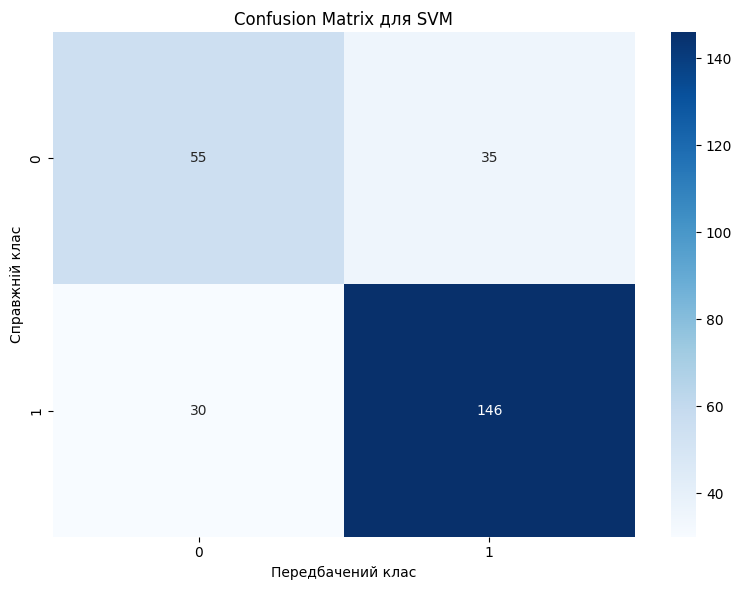


Classification Report для SVM:
              precision    recall  f1-score   support

         0.0       0.65      0.61      0.63        90
         1.0       0.81      0.83      0.82       176

    accuracy                           0.76       266
   macro avg       0.73      0.72      0.72       266
weighted avg       0.75      0.76      0.75       266



In [152]:
# 5.3 SVM з підбором оптимальних параметрів
print("5.3 Навчання SVM з підбором параметрів.")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf','linear','sigmoid']
}

svm_grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
svm_grid.fit(X_train_scaled, y_train)

print(f"Оптимальні параметри SVM: {svm_grid.best_params_}")
y_pred_svm = svm_grid.predict(X_test_scaled)
results['SVM'] = accuracy_score(y_test, y_pred_svm)
print(f"Точність SVM: {results['SVM']:.4f}")

# Confusion Matrix і Classification Report для SVM
print("\nConfusion Matrix для SVM:")
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix для SVM')
plt.ylabel('Справжній клас')
plt.xlabel('Передбачений клас')
plt.tight_layout()
plt.show()

print("\nClassification Report для SVM:")
print(classification_report(y_test, y_pred_svm))

Навчаю модель Random Forest


5.4 Навчання Random Forest.
Точність Random Forest: 0.7669

Confusion Matrix для Random Forest:


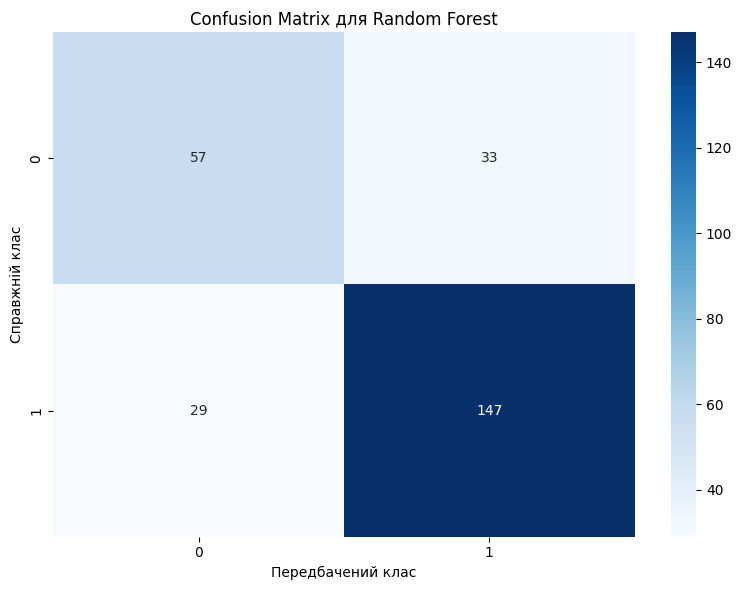


Classification Report для Random Forest:
              precision    recall  f1-score   support

         0.0       0.66      0.63      0.65        90
         1.0       0.82      0.84      0.83       176

    accuracy                           0.77       266
   macro avg       0.74      0.73      0.74       266
weighted avg       0.76      0.77      0.77       266



In [153]:
# 5.4 Random Forest
print("\n5.4 Навчання Random Forest.")
rf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=9)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
results['Random Forest'] = accuracy_score(y_test, y_pred_rf)
print(f"Точність Random Forest: {results['Random Forest']:.4f}")

# Confusion Matrix і Classification Report для Random Forest
print("\nConfusion Matrix для Random Forest:")
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix для Random Forest')
plt.ylabel('Справжній клас')
plt.xlabel('Передбачений клас')
plt.tight_layout()
plt.show()

print("\nClassification Report для Random Forest:")
print(classification_report(y_test, y_pred_rf))

Вручну підібрані параметри допомогли знайти найвищк допустиму точність для Random Forest.

Навчаю модель AdaBoost.


5.5 Навчання AdaBoost.
Точність AdaBoost: 0.7444

Confusion Matrix для AdaBoost:


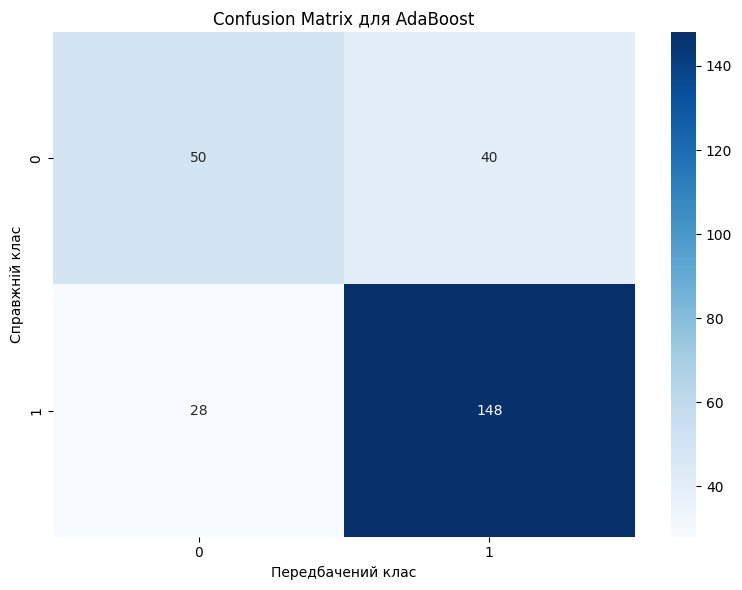


Classification Report для AdaBoost:
              precision    recall  f1-score   support

         0.0       0.64      0.56      0.60        90
         1.0       0.79      0.84      0.81       176

    accuracy                           0.74       266
   macro avg       0.71      0.70      0.70       266
weighted avg       0.74      0.74      0.74       266



In [154]:
# 5.5 AdaBoost
print("\n5.5 Навчання AdaBoost.")
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_scaled, y_train)
y_pred_ada = ada.predict(X_test_scaled)
results['AdaBoost'] = accuracy_score(y_test, y_pred_ada)
print(f"Точність AdaBoost: {results['AdaBoost']:.4f}")

# Confusion Matrix і Classification Report для AdaBoost
print("\nConfusion Matrix для AdaBoost:")
cm = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix для AdaBoost')
plt.ylabel('Справжній клас')
plt.xlabel('Передбачений клас')
plt.tight_layout()
plt.show()

print("\nClassification Report для AdaBoost:")
print(classification_report(y_test, y_pred_ada))


        Модель  Точність
Random Forest  0.766917
          SVM  0.755639
     AdaBoost  0.744361
          kNN  0.740602
Decision Tree  0.714286


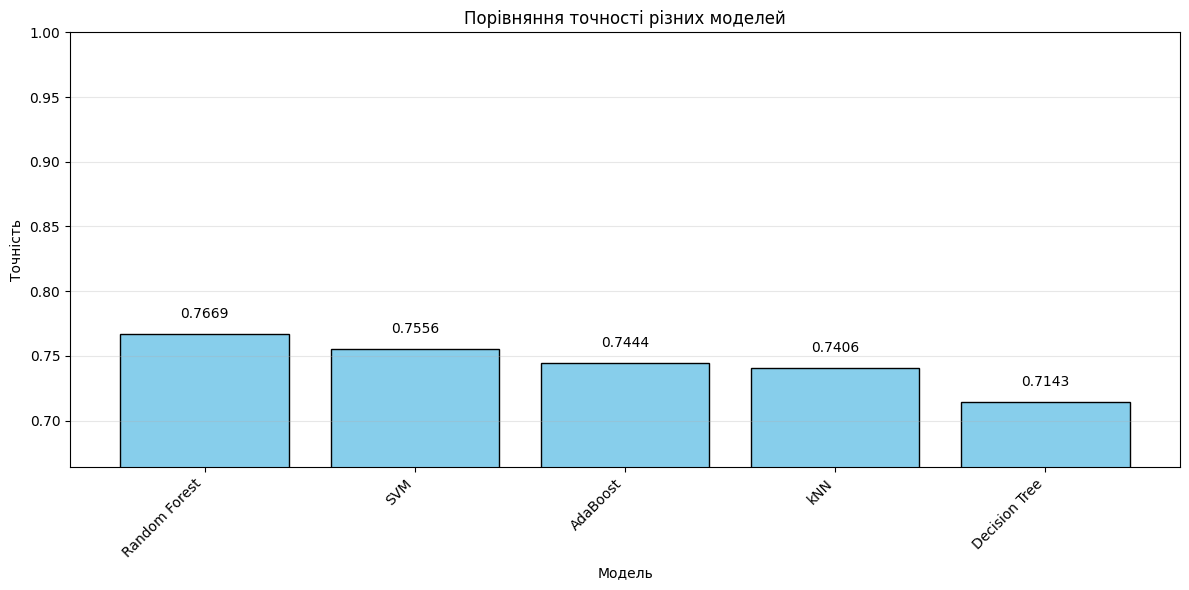

In [155]:
# Порівняння усіх моделей за точністю передбачення
results_df = pd.DataFrame(list(results.items()), columns=['Модель', 'Точність'])
results_df = results_df.sort_values('Точність', ascending=False)
print("\n", results_df.to_string(index=False))

# Візуалізація порівняння
plt.figure(figsize=(12, 6))
plt.bar(results_df['Модель'], results_df['Точність'], color='skyblue', edgecolor='black')
plt.xlabel('Модель')
plt.ylabel('Точність')
plt.title('Порівняння точності різних моделей')
plt.ylim([min(results_df['Точність']) - 0.05, 1.0])
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(results_df['Точність']):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


Accuracy Score:
0.7669172932330827

Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.63      0.65        90
         1.0       0.82      0.84      0.83       176

    accuracy                           0.77       266
   macro avg       0.74      0.73      0.74       266
weighted avg       0.76      0.77      0.77       266



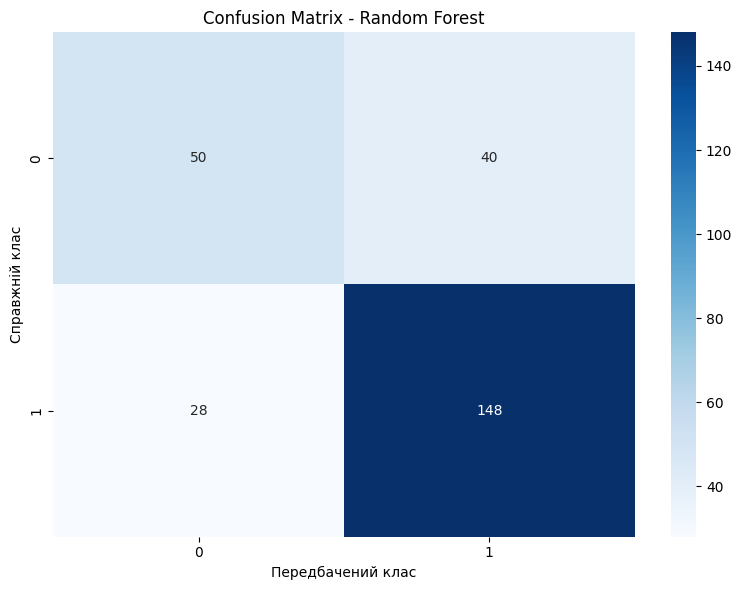

In [156]:
best_model_name = results_df.iloc[0]['Модель']
# Вибір прередбчень найкращої моделі
predictions_map = {
    'kNN': y_pred_knn,
    'Decision Tree': y_pred_dt,
    'SVM': y_pred_svm,
    'Random Forest': y_pred_rf,
    'AdaBoost': y_pred_ada
}

y_pred_best = predictions_map[best_model_name]

#Точність моделі
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_best))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Візуалізація Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Справжній клас')
plt.xlabel('Передбачений клас')
plt.tight_layout()
plt.show()